In [112]:
import pandas as pd
import numpy as np
import datatable as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mtp

from joblib import dump
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,recall_score,roc_auc_score,RocCurveDisplay

pd.set_option('display.max_columns', 500)

In [88]:
df_train_pp=pd.read_csv("../data/processed/df_train_pp.csv",index_col=0)
df_test_pp=pd.read_csv("../data/processed/df_test_pp.csv",index_col=0)
ids=pd.read_csv("../data/processed/ids.csv",index_col=0)

In [89]:
df_train_pp.head()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,checked_delivery_detail,checked_returns_detail,sign_in,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered,mean
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0.125000
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.083333
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0.125000
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0.125000
4,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,1,1,0.416667


## As we have saw "_device_mobile_" as a negative correlation, we will drop it

In [90]:
X = df_train_pp.drop(['ordered','device_mobile'],axis=1)
y=df_train_pp.ordered

In [91]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=0.2, random_state=42, stratify= y)

In [92]:
X_tr.shape, X_ts.shape

((364320, 23), (91081, 23))

In [93]:
logit = LogisticRegression()

In [94]:
logit.fit(X_tr,y_tr)

C:\Users\brito\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
preds = logit.predict(X_ts)

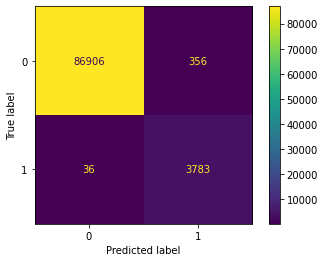

In [96]:
ConfusionMatrixDisplay.from_estimator(logit,X_ts,y_ts)


## A simple and straight foward model solve our problems.

In [97]:
print(f"The model has a accuracy of: {accuracy_score(y_ts,preds):.4f}")
print(f"The model has a recall of: {recall_score(y_ts,preds):.4f}")
print(f"AUC from the model: {roc_auc_score(y_ts,preds):.4f}")

The model has a accuracy of: 0.9957
The model has a recall of: 0.9906
AUC from the model: 0.9932


<Figure size 1872x1728 with 0 Axes>

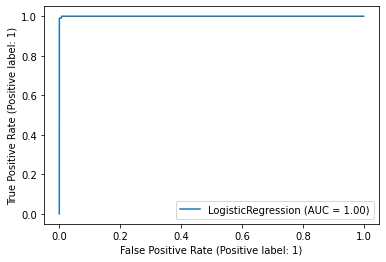

In [98]:
plt.figure(figsize=(26, 24))
roc_auc = RocCurveDisplay.from_estimator(logit, X_ts,y_ts)
plt.show()


## Let's check our test dataset

In [79]:
df_test_pp.head()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,checked_delivery_detail,checked_returns_detail,sign_in,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered,mean
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0.125000
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.083333
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0.125000
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0.125000
4,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,1,1,0.416667


## As we are working with a data that is supposed to predict if a customer will/won`t buy. We need to preserve our ID's for the df_test

## In order to do that, I have previoulsy saved all the Id's

In [62]:
ids.head(2)

,UserID
0,9d24-25k4-47889d24-25k4-494b-398124
1,7732-1k58-47887732-1k58-4475-679678


In [99]:
predictfin = df_test_pp.drop(['ordered','device_mobile'],axis=1)

In [105]:
predictfin["% to order"]= logit.predict_proba(predictfin)[:,1]

In [106]:
predictfin.head()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,checked_delivery_detail,checked_returns_detail,sign_in,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_computer,device_tablet,returning_user,loc_uk,mean,% to order
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.125000,0.000516
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.083333,0.000005
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.125000,0.000007
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.125000,0.000007
4,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,1,0.416667,0.886338


In [107]:
result = pd.concat([ids,predictfin],axis=1)

In [108]:
result.head()

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,checked_delivery_detail,checked_returns_detail,sign_in,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_computer,device_tablet,returning_user,loc_uk,mean,% to order
0,9d24-25k4-47889d24-25k4-494b-398124,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.125000,0.000516
1,7732-1k58-47887732-1k58-4475-679678,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.083333,0.000005
2,94k2-632j-471394k2-632j-4b4j-228160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.125000,0.000007
3,jdd8-419d-4714jdd8-419d-4198-674376,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.125000,0.000007
4,7473-7595-47147473-7595-4757-227547,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,1,0.416667,0.886338


In [110]:
result.to_csv("../data/processed/result.csv")

In [113]:
dump(logit,"../models/logit_Kaggle.joblib")

['../models/logit_Kaggle.joblib']